Importing Libraries

In [189]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 

Reading the Dataset

In [190]:
df = pd.read_csv(r"C:\Users\1032085\Desktop\Swami_Drama\GL\Capstone\dataset\diabetes.csv")

In [191]:
# The first 5 observation units of the data set were accessed.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [192]:
# The size of the data set was examined. 

df.shape

(768, 9)

In [193]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


EDA and Visualisations

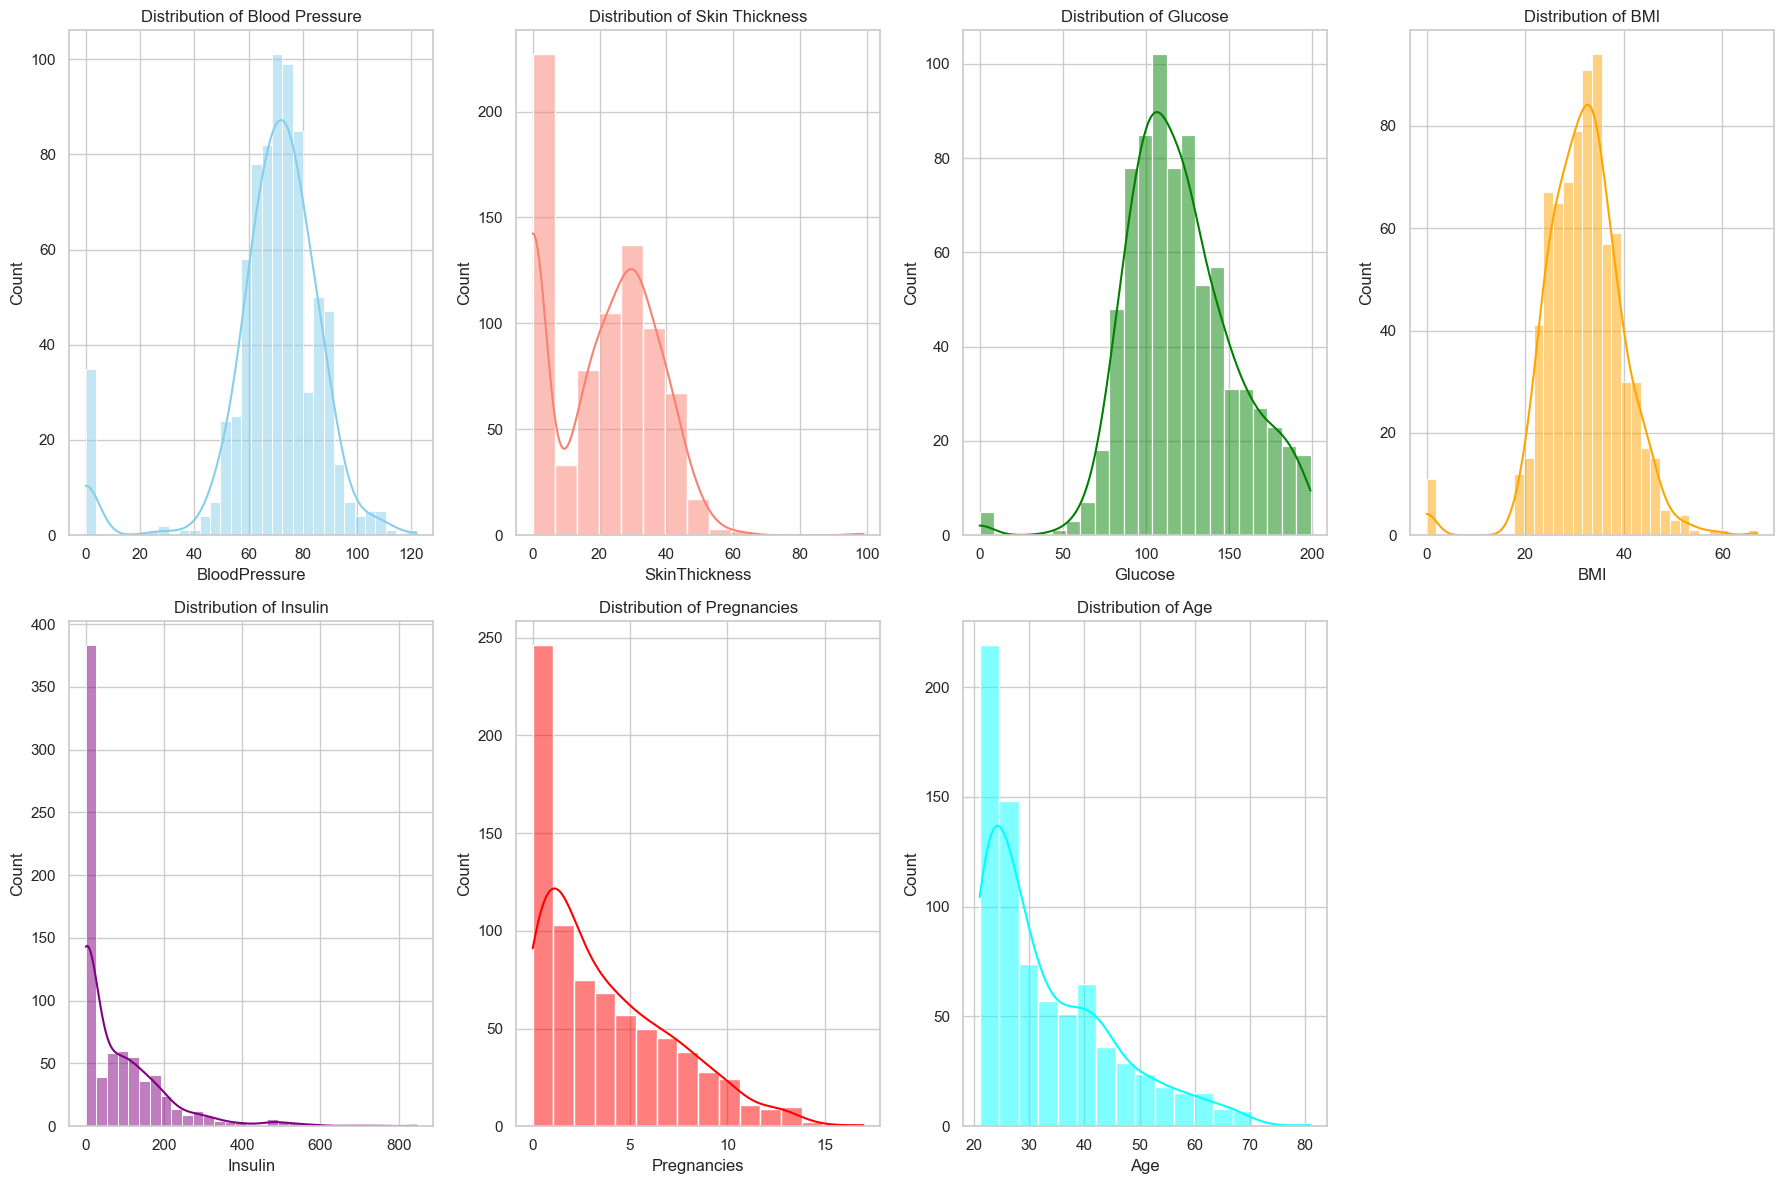

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# Define a custom color palette for the plots
colors = ['skyblue', 'salmon', 'green', 'orange', 'purple', 'red', 'cyan']

# Plot for BloodPressure
plt.subplot(2, 4, 1)
sns.histplot(df['BloodPressure'], kde=True, color=colors[0])
plt.title('Distribution of Blood Pressure')

# Plot for SkinThickness
plt.subplot(2, 4, 2)
sns.histplot(df['SkinThickness'], kde=True, color=colors[1])
plt.title('Distribution of Skin Thickness')

# Plot for Glucose
plt.subplot(2, 4, 3)
sns.histplot(df['Glucose'], kde=True, color=colors[2])
plt.title('Distribution of Glucose')

# Plot for BMI
plt.subplot(2, 4, 4)
sns.histplot(df['BMI'], kde=True, color=colors[3])
plt.title('Distribution of BMI')

# Plot for Insulin
plt.subplot(2, 4, 5)
sns.histplot(df['Insulin'], kde=True, color=colors[4])
plt.title('Distribution of Insulin')

# Plot for Pregnancies
plt.subplot(2, 4, 6)
sns.histplot(df['Pregnancies'], kde=True, color=colors[5])
plt.title('Distribution of Pregnancies')

# Plot for Age
plt.subplot(2, 4, 7)
sns.histplot(df['Age'], kde=True, color=colors[6])
plt.title('Distribution of Age')

plt.tight_layout()
plt.show()

In [195]:
# Descriptive statistics of the data set accessed.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [196]:
# The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [197]:
# The classes of the outcome variable were examined.
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

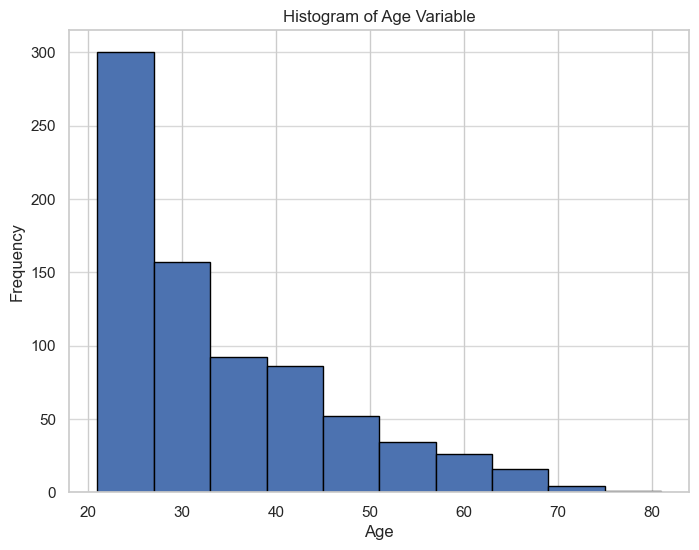

In [198]:
# Plotting the histogram of the "Age" variable
plt.figure(figsize=(8, 6))
plt.hist(df["Age"], edgecolor="black", bins=10)  # Adjust the number of bins as needed
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age Variable")
plt.grid(axis='y', alpha=0.75)
plt.show()

Ploting for all the Independent Features

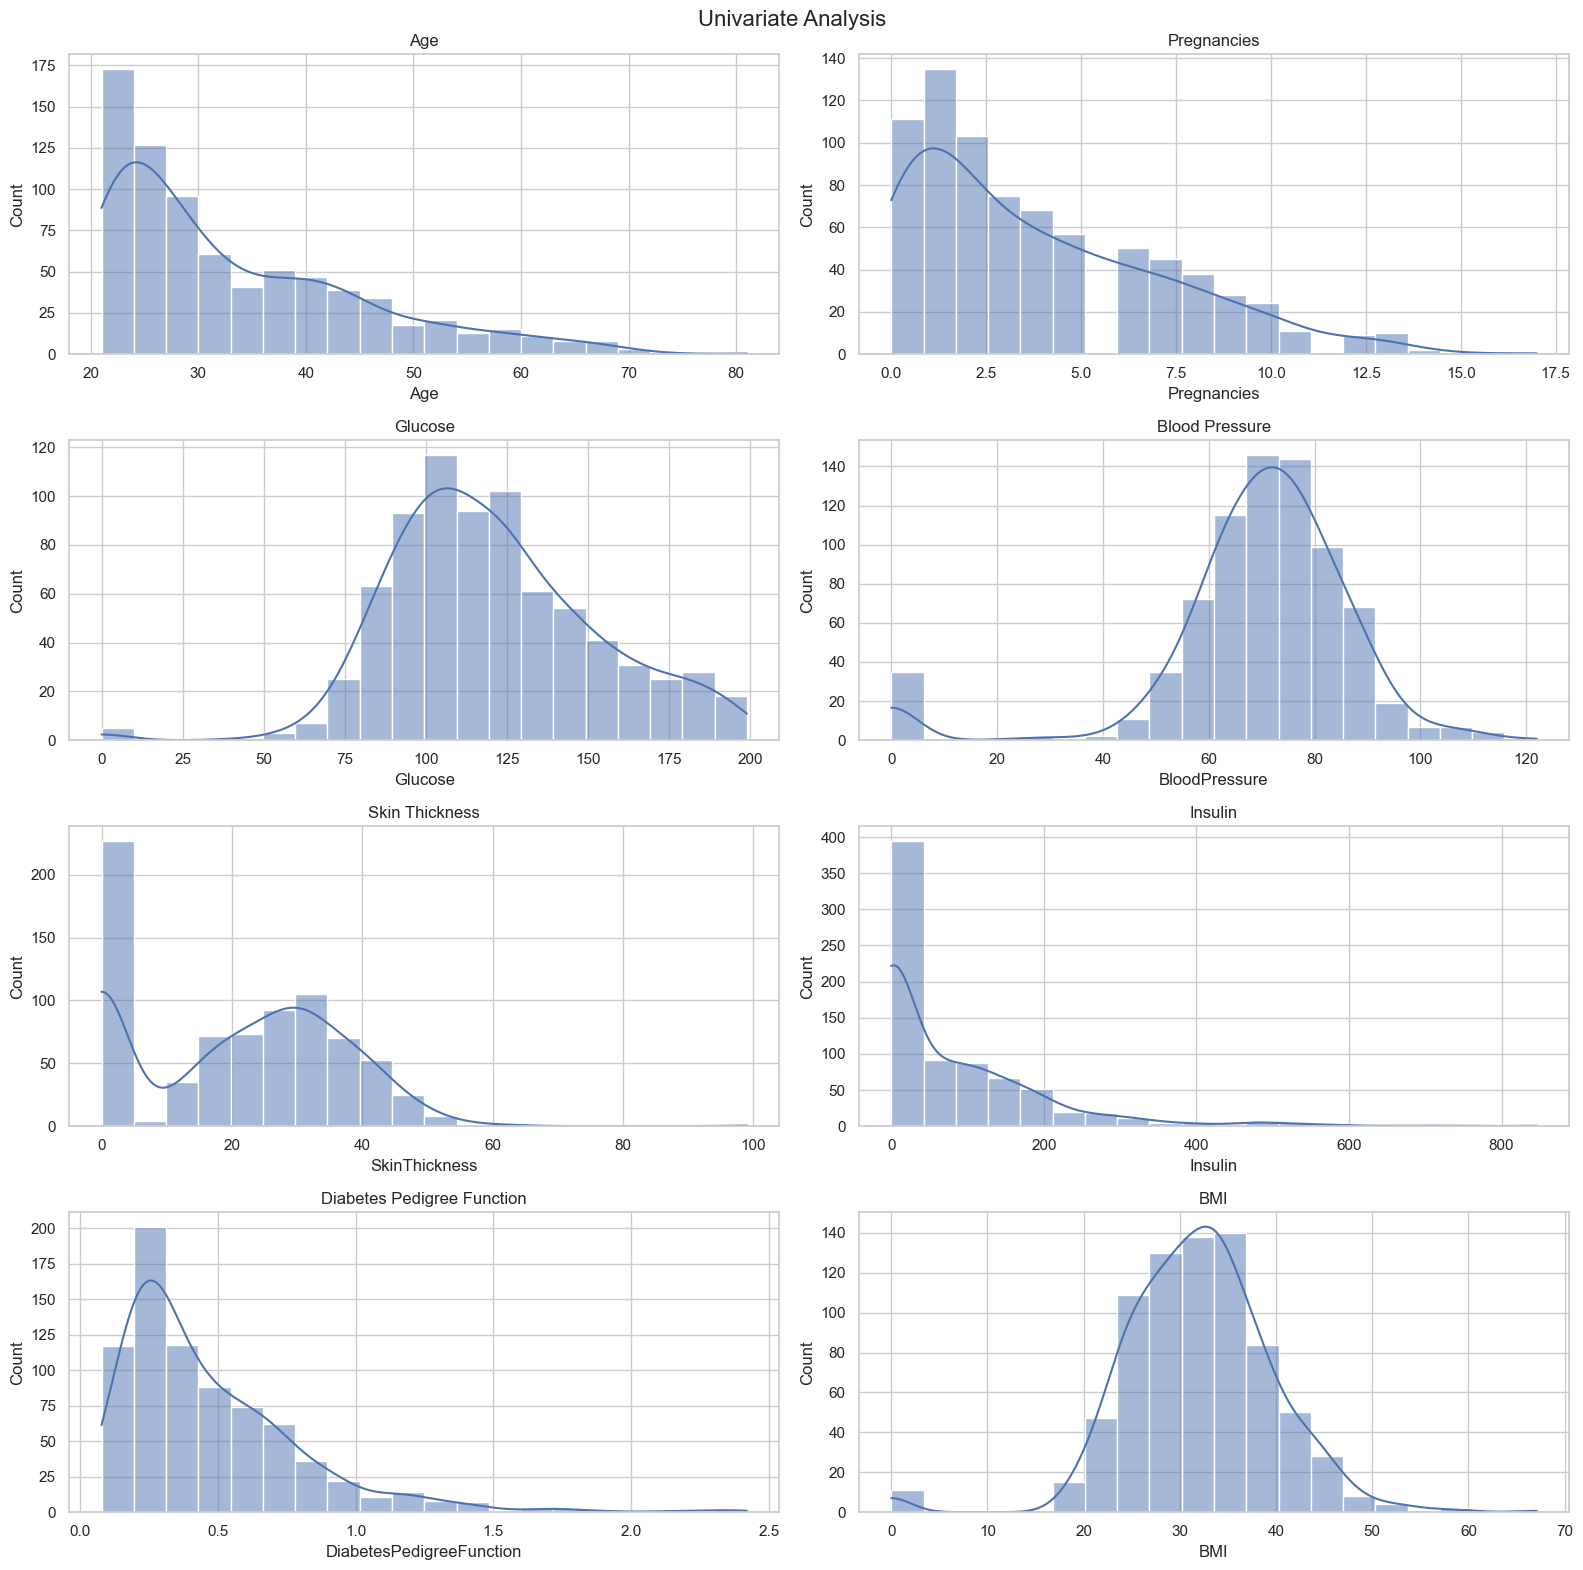

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each variable
fig, ax = plt.subplots(4, 2, figsize=(16, 16))

# Plot histograms with KDE for each variable
sns.histplot(df["Age"], bins=20, ax=ax[0, 0], kde=True)
sns.histplot(df["Pregnancies"], bins=20, ax=ax[0, 1], kde=True)
sns.histplot(df["Glucose"], bins=20, ax=ax[1, 0], kde=True)
sns.histplot(df["BloodPressure"], bins=20, ax=ax[1, 1], kde=True)
sns.histplot(df["SkinThickness"], bins=20, ax=ax[2, 0], kde=True)
sns.histplot(df["Insulin"], bins=20, ax=ax[2, 1], kde=True)
sns.histplot(df["DiabetesPedigreeFunction"], bins=20, ax=ax[3, 0], kde=True)
sns.histplot(df["BMI"], bins=20, ax=ax[3, 1], kde=True)

# Set titles for each subplot
ax[0, 0].set_title("Age")
ax[0, 1].set_title("Pregnancies")
ax[1, 0].set_title("Glucose")
ax[1, 1].set_title("Blood Pressure")
ax[2, 0].set_title("Skin Thickness")
ax[2, 1].set_title("Insulin")
ax[3, 0].set_title("Diabetes Pedigree Function")
ax[3, 1].set_title("BMI")

# Add a main title to the set of subplots
plt.suptitle("Univariate Analysis", fontsize=16)

plt.tight_layout()
plt.show()

In [139]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 81 Min Age: 21


In [140]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [141]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [142]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [143]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [144]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [145]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [146]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [147]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


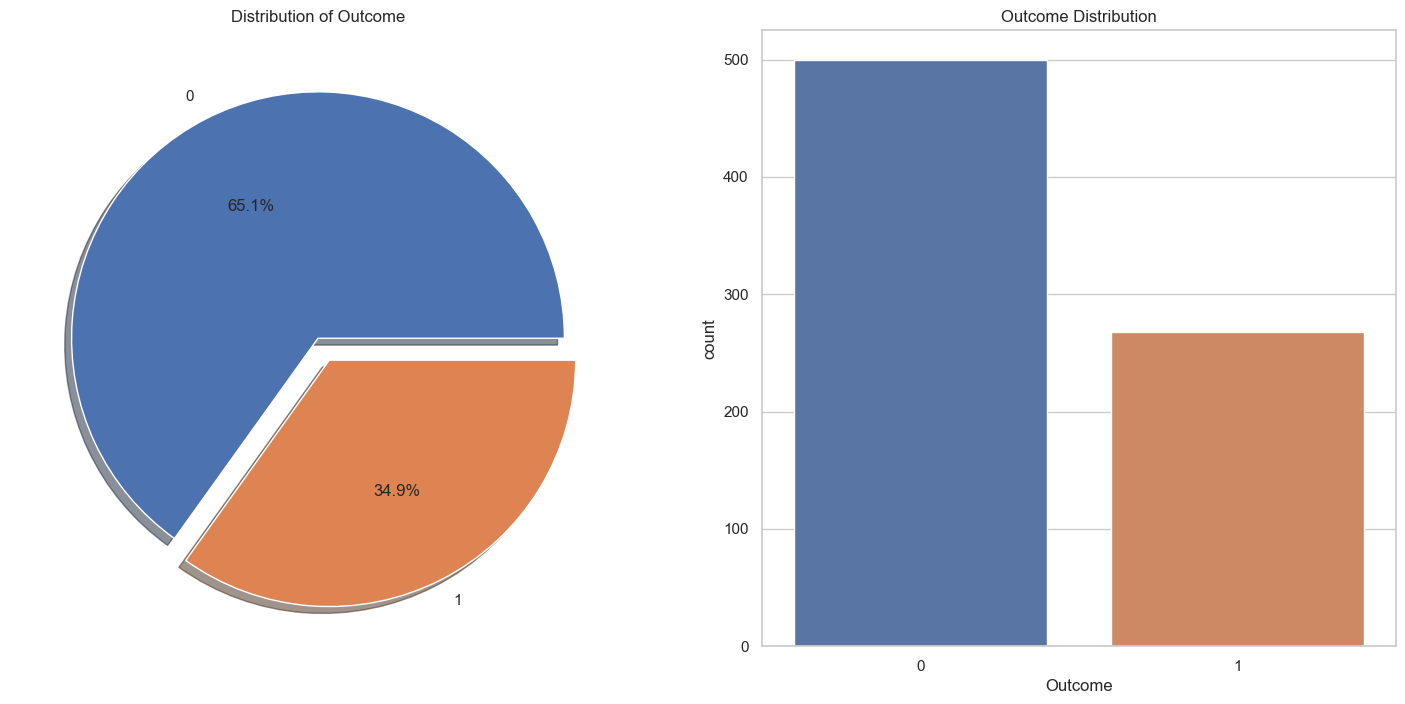

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for visualization
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for Outcome variable
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Distribution of Outcome')
ax[0].set_ylabel('')

# Count plot for Outcome variable
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome Distribution')

plt.show()

Bivariate Analysis

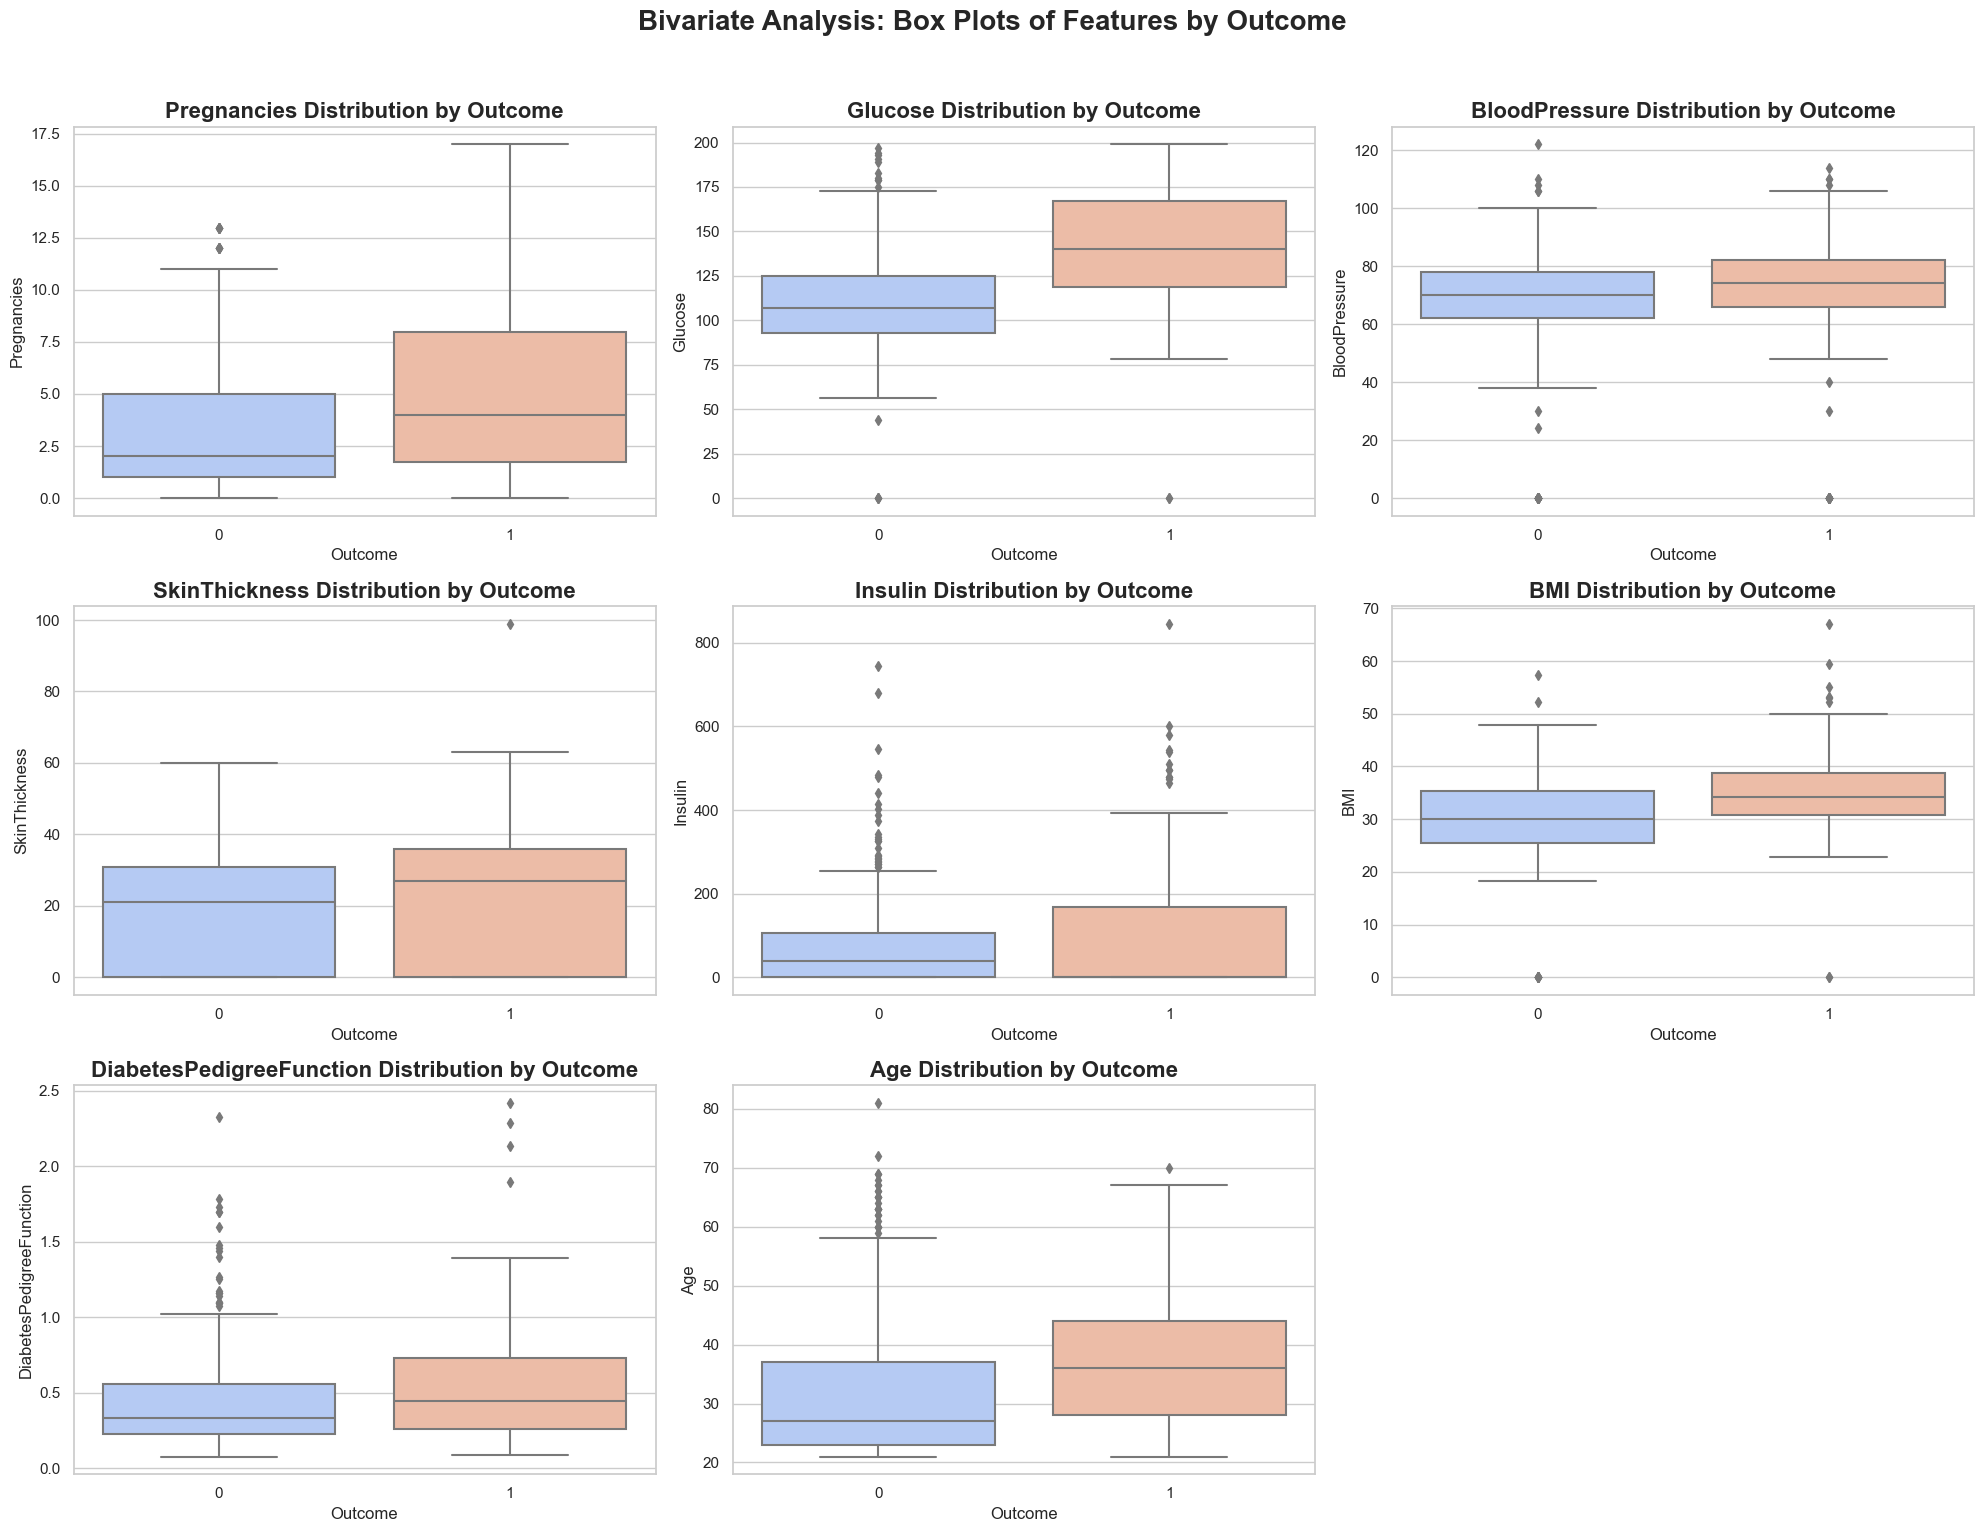

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the style of seaborn plots
sns.set(style="whitegrid")

# Define the size of the overall figure
plt.figure(figsize=(20, 15))

features = df.columns[:-1]  # Extracting all columns except the target variable 'Outcome'

# Creating box plots for each feature with respect to the target variable 'Outcome'
for i, feature in enumerate(features, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=feature, data=df, palette='coolwarm')

    plt.xlabel('Outcome', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.title(f'{feature} Distribution by Outcome', fontsize=16, fontweight='bold')

plt.suptitle('Bivariate Analysis: Box Plots of Features by Outcome', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

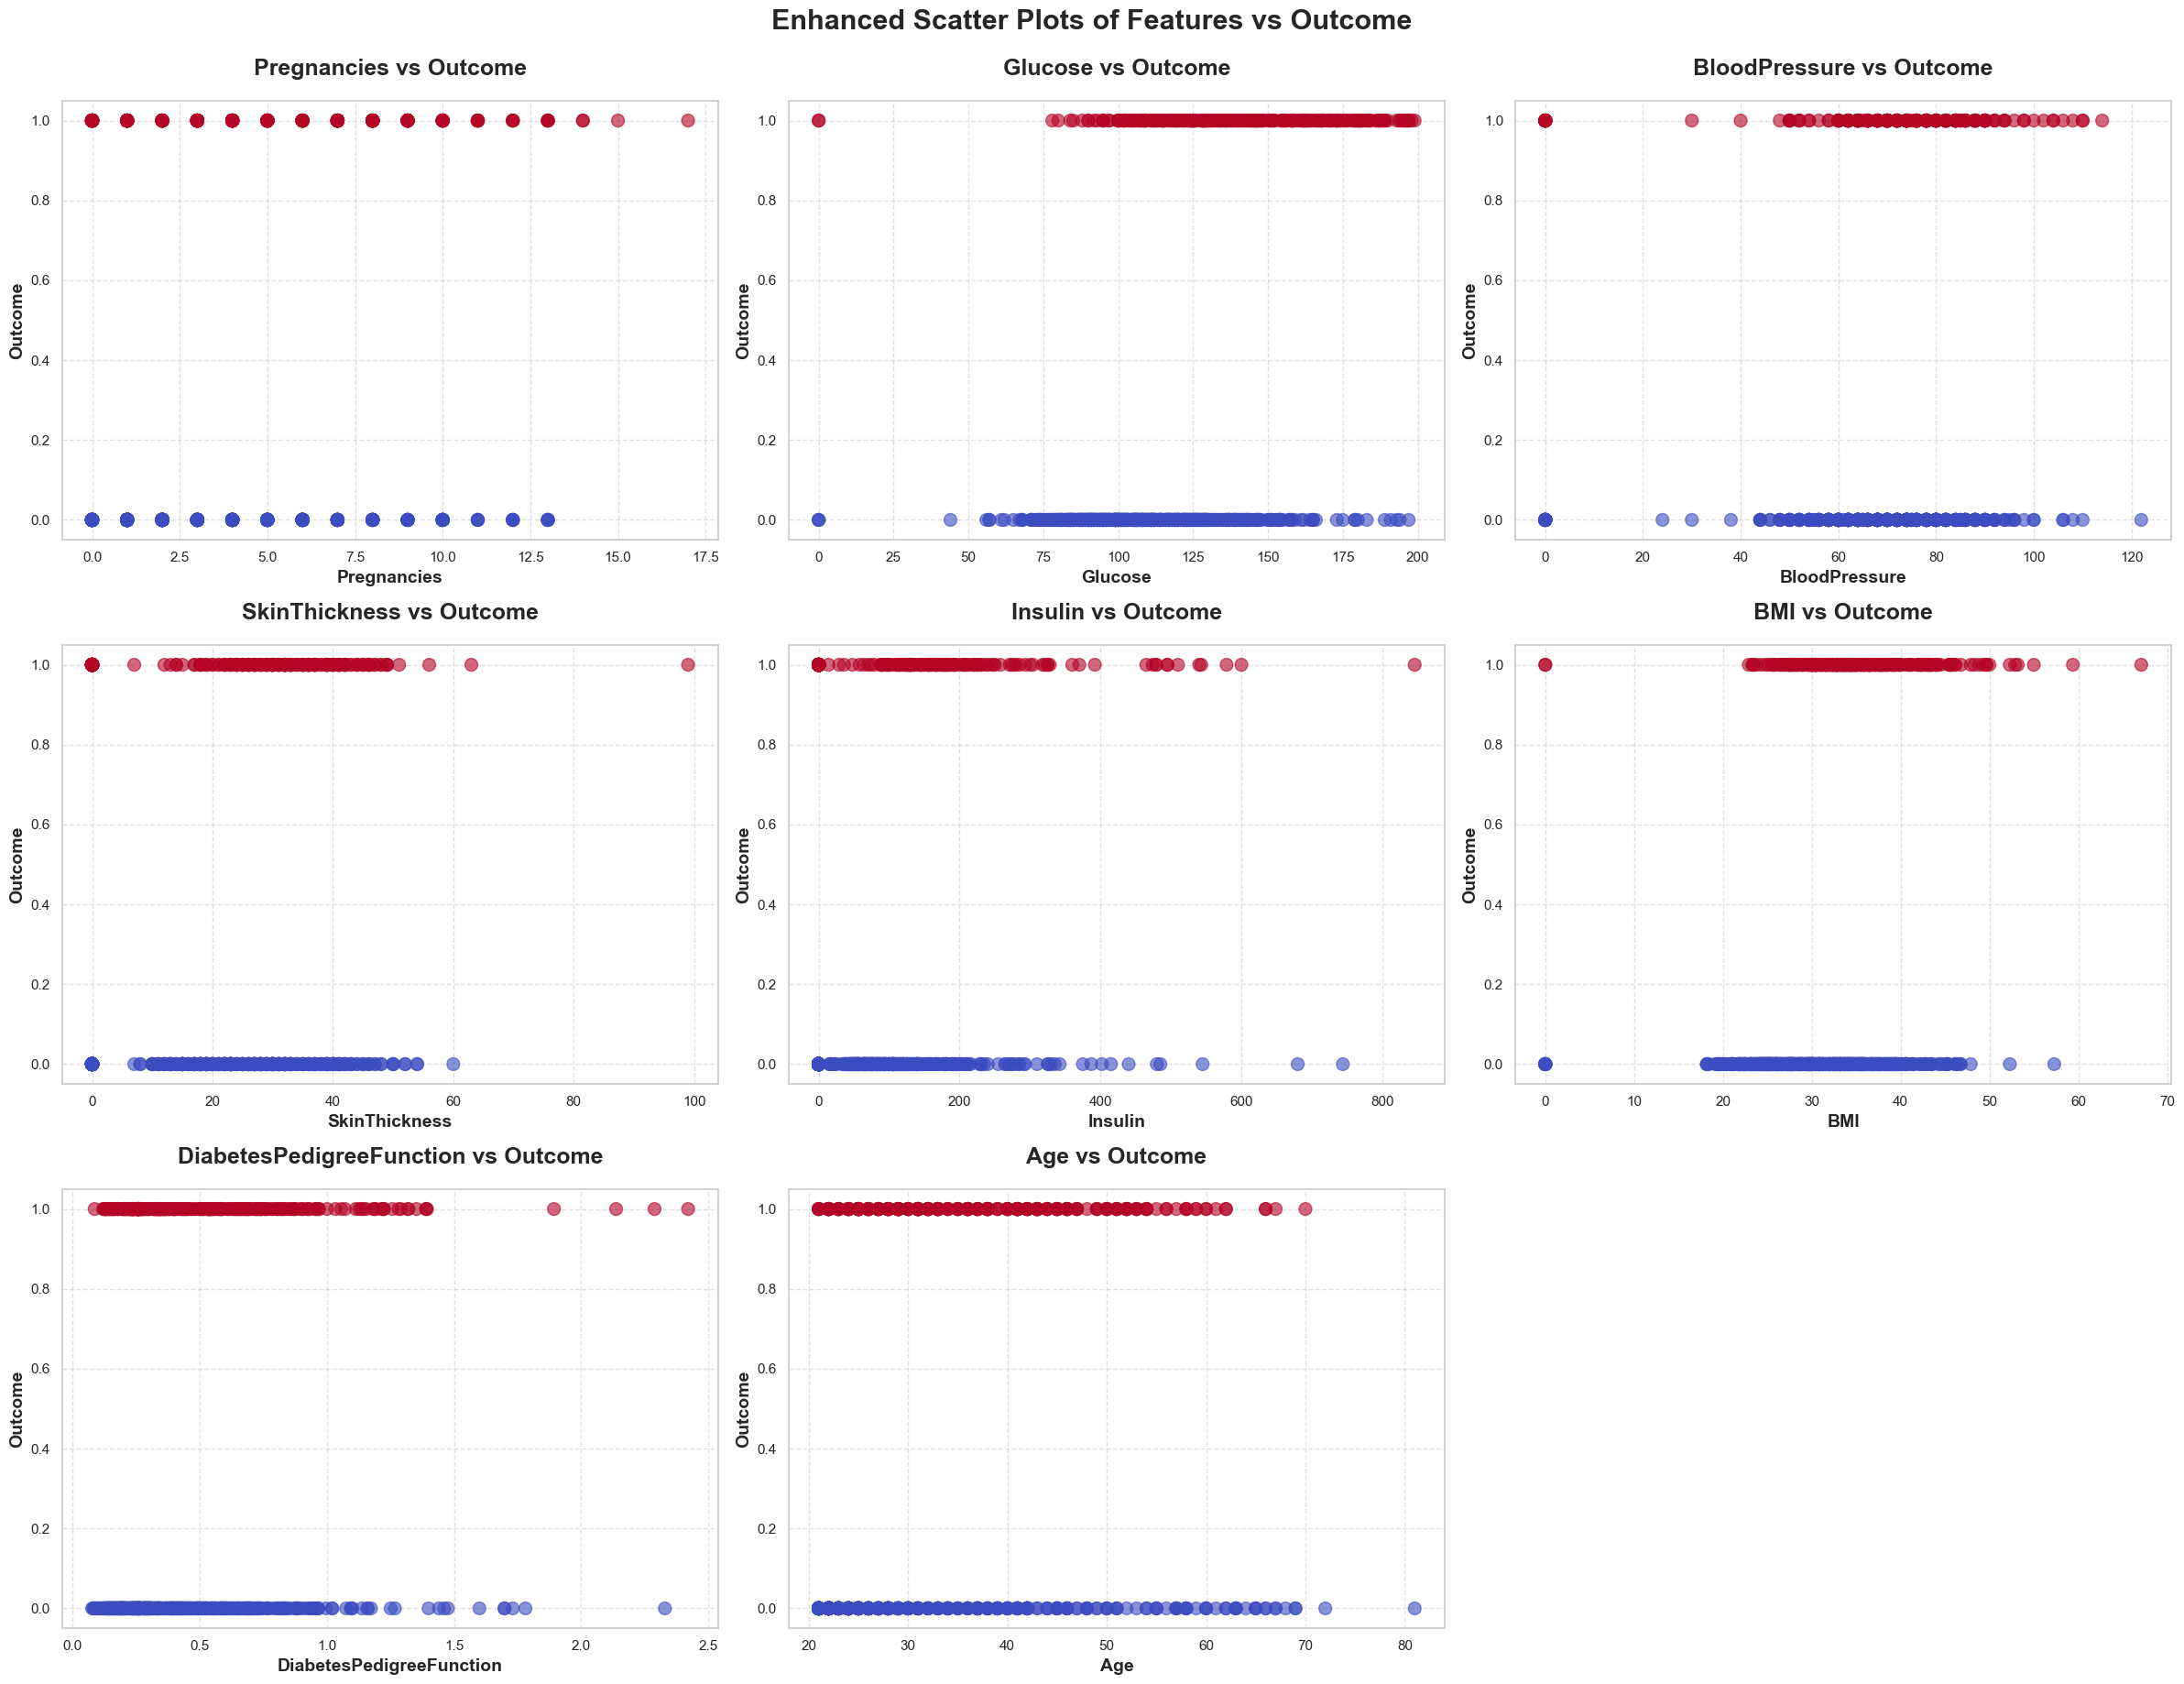

In [150]:
import matplotlib.pyplot as plt

# Define the size of the overall figure
plt.figure(figsize=(24, 18))

features = df.columns[:-1]  # Extracting all columns except the target variable 'Outcome'

for i, feature in enumerate(features, start=1):
    plt.subplot(3, 3, i)
    plt.scatter(df[feature], df['Outcome'], c=df['Outcome'], cmap='coolwarm', alpha=0.6, s=100)
    plt.xlabel(feature, fontsize=14, fontweight='bold')
    plt.ylabel('Outcome', fontsize=14, fontweight='bold')
    plt.title(f'{feature} vs Outcome', fontsize=18, fontweight='bold', pad=20)
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

plt.suptitle('Enhanced Scatter Plots of Features vs Outcome', fontsize=22, fontweight='bold', y=1.02)
plt.show()

In [151]:
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 2 variables that act as a positive correlation to the dependent Variable
# These variables are Glucose and Age
# As these increase, Outcome variable increases.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


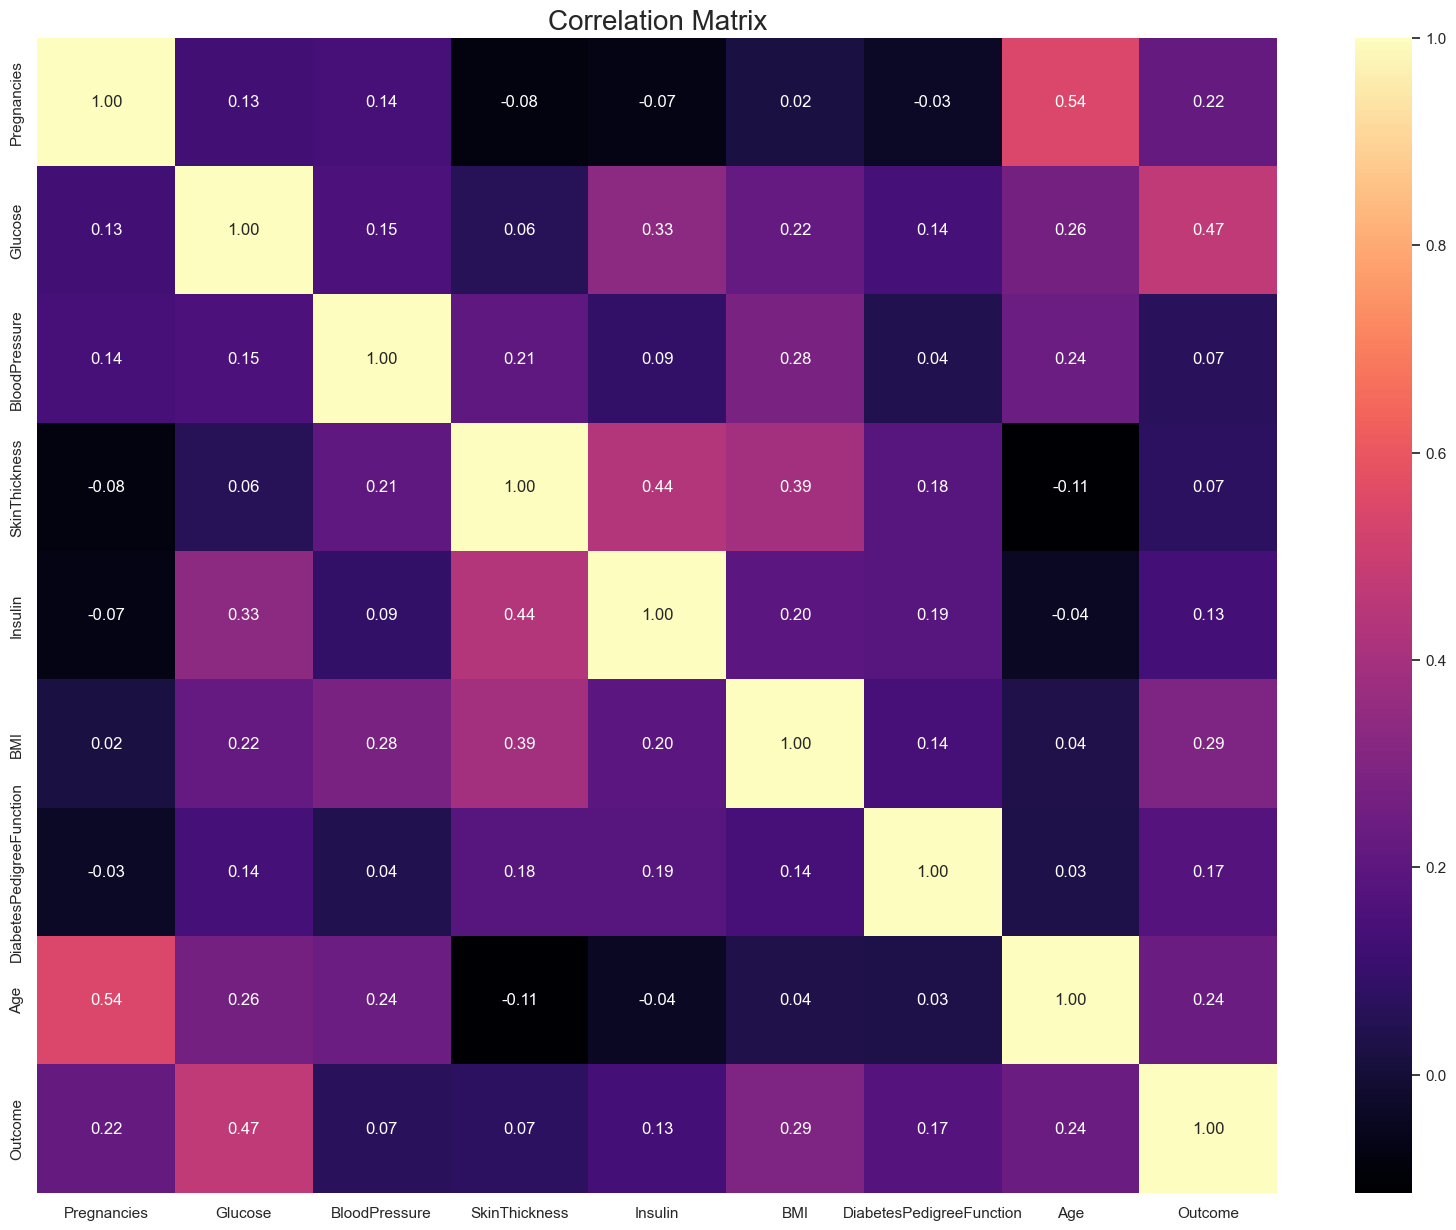

In [152]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

Trying to find hidden Patterns and relationships in the data with Unsupervised learning


Clustering (Unsupervised learning)

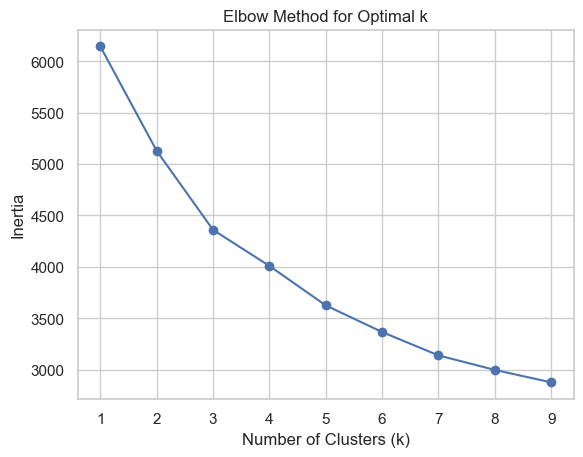

In [153]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

# Removing the 'Outcome' column from the 'df' dataset
df_unsupervised = df.drop('Outcome', axis=1)

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_unsupervised)

# Calculate inertia for different values of k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Groups Assigned


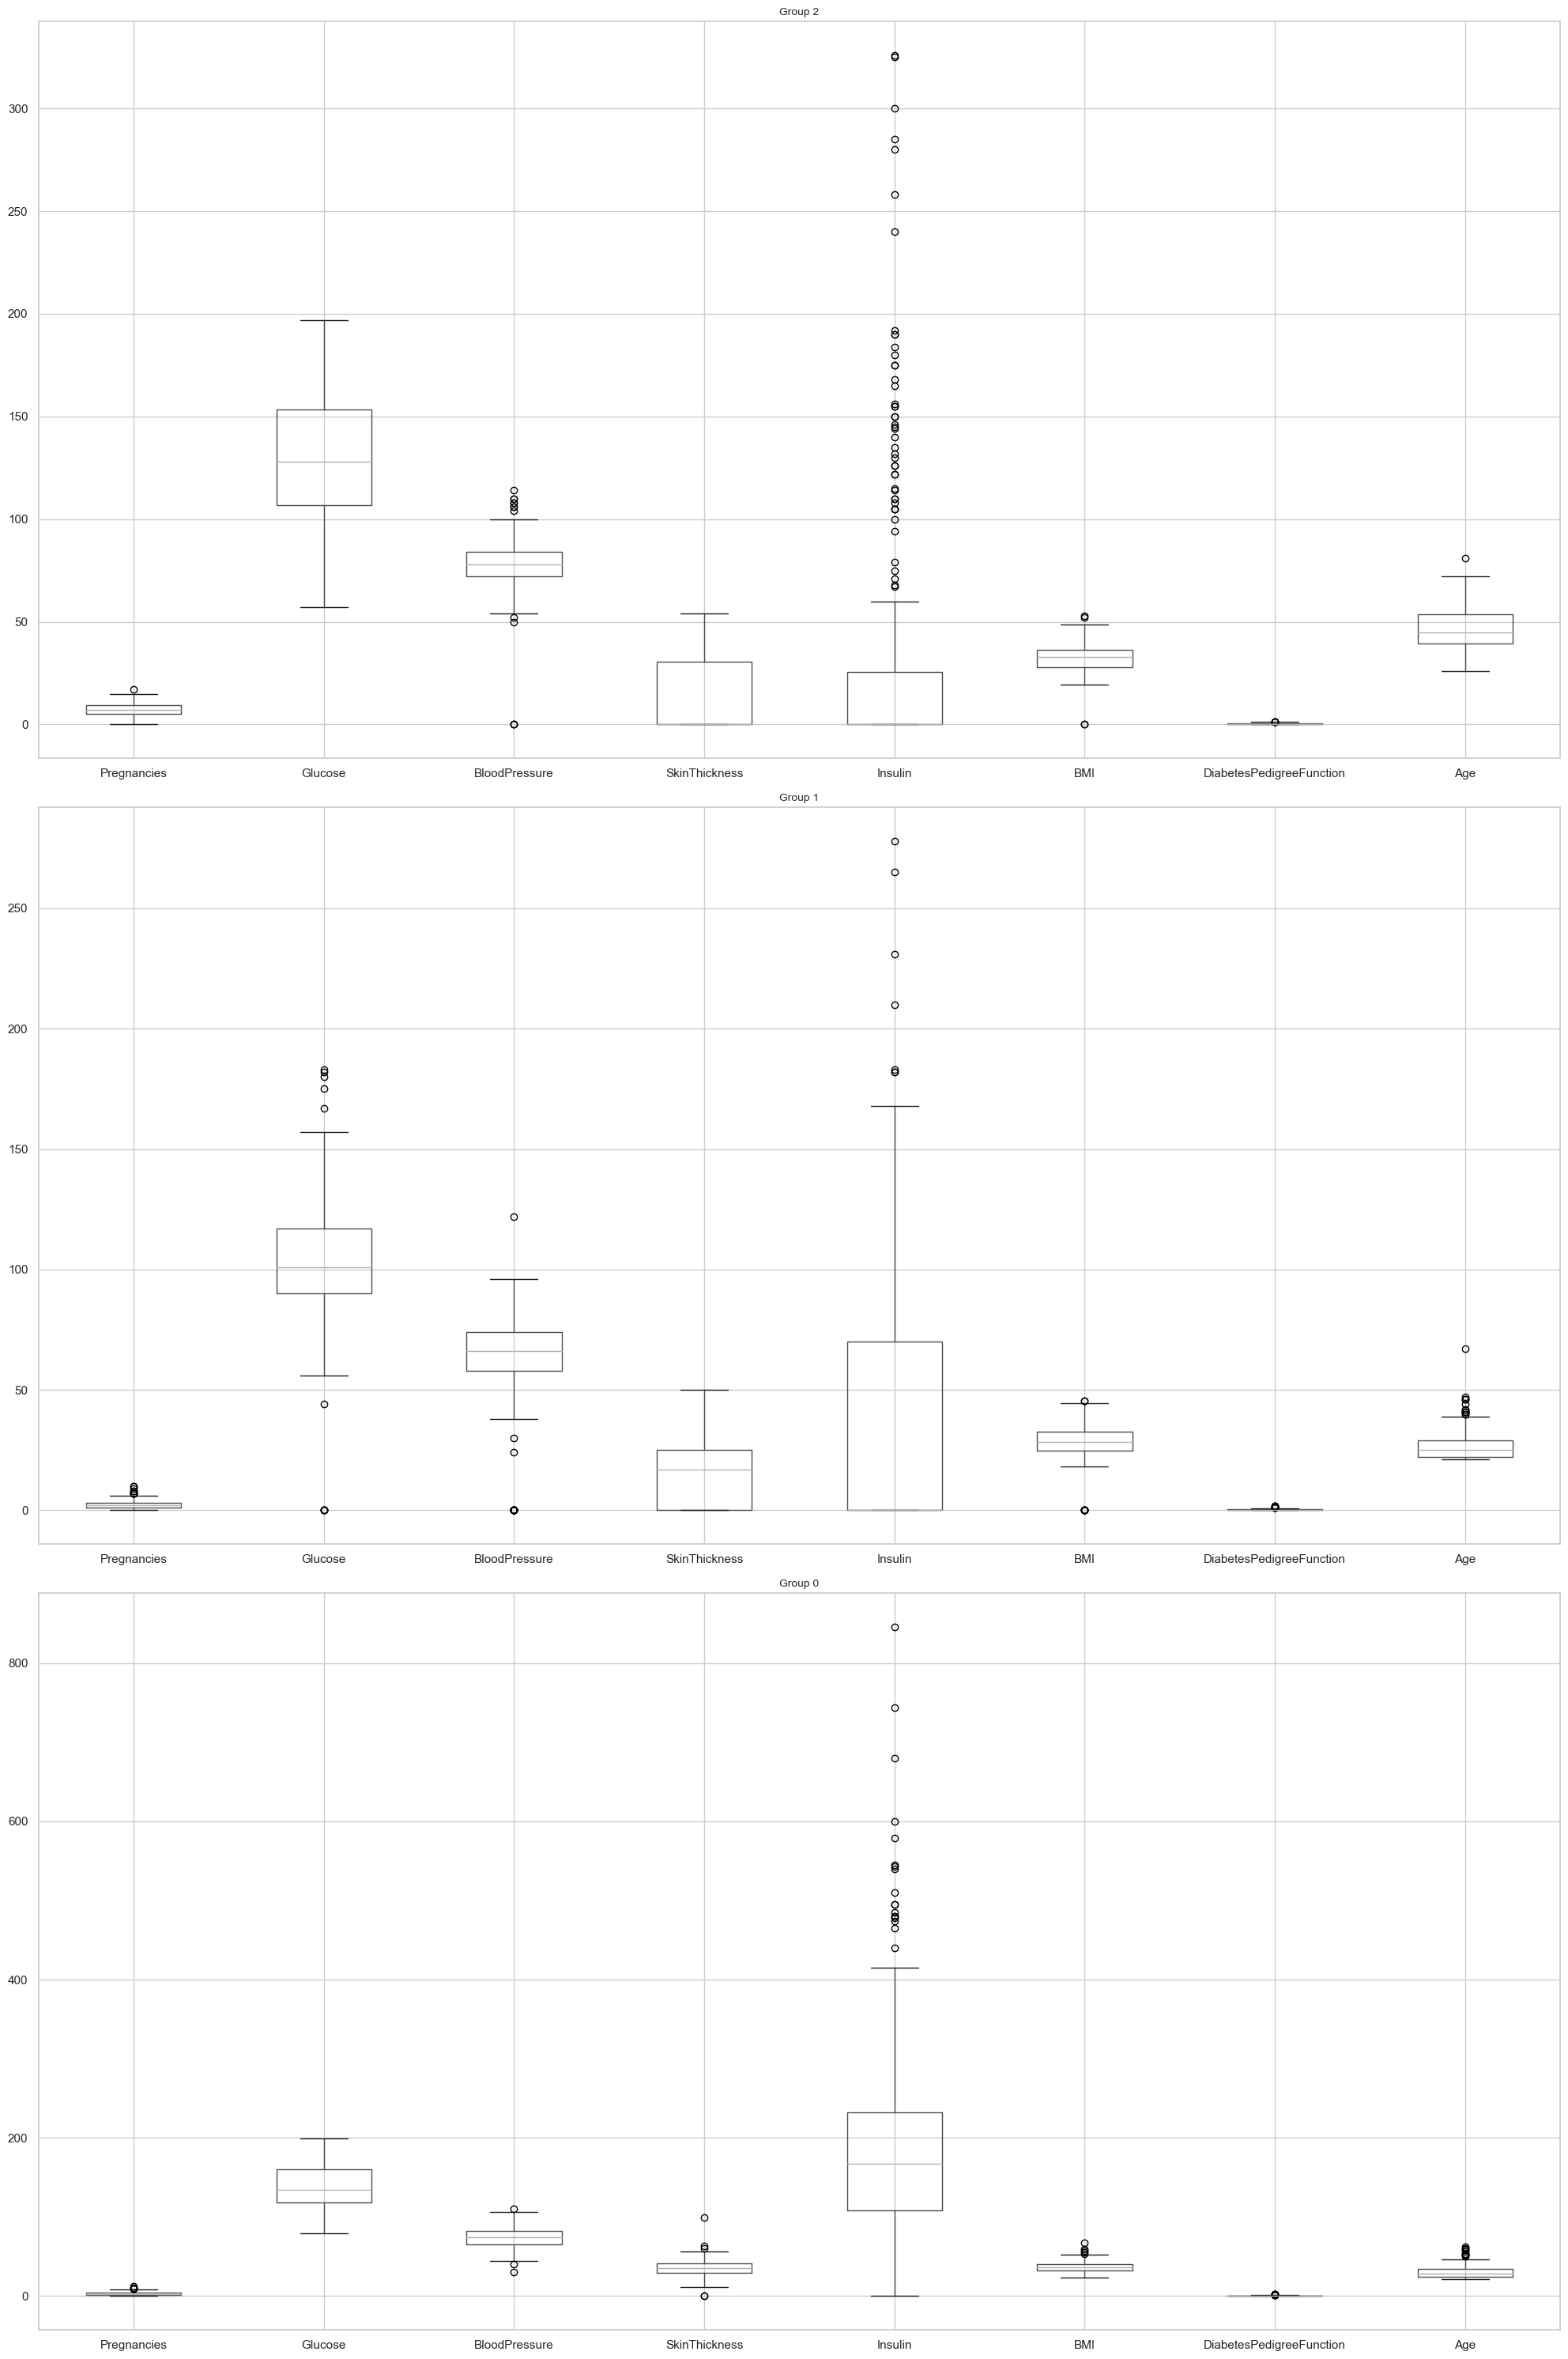

In [154]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Perform K-means clustering with the optimal number of clusters (let's assume 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)
prediction = kmeans.predict(df_scaled)

# Add cluster labels to the dataset
df_unsupervised['Group'] = prediction
print("Groups Assigned")

df_for_boxplot = df_unsupervised.drop('Group', axis=1)

plt.figure(figsize=(20,30))  # Adjust the figure size for a 3x1 grid

# Plot individual box plots for each group in a 3x1 grid
for idx, group_num in enumerate(df_unsupervised['Group'].unique()):
    plt.subplot(3, 1, idx + 1)  # Create a 3x1 grid
    group_data = df_for_boxplot[df_unsupervised['Group'] == group_num]
    group_data.boxplot()
    plt.title(f'Group {group_num}', fontsize=10)  # Adjust font size for better readability

plt.subplots_adjust(hspace=0.5)  # Adjust the height spacing between subplots
plt.tight_layout()
plt.show()

<Figure size 3000x1000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

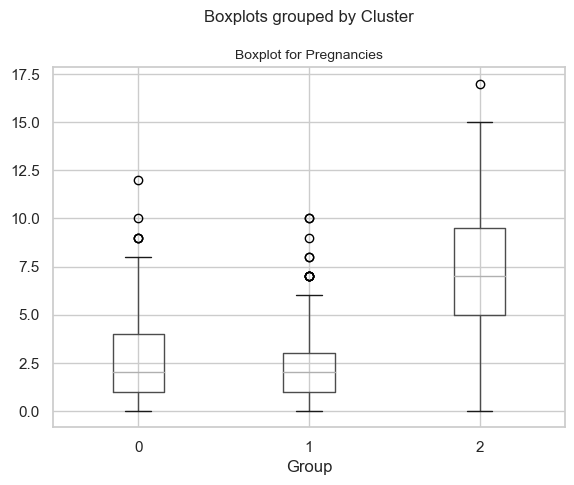

<Figure size 640x480 with 0 Axes>

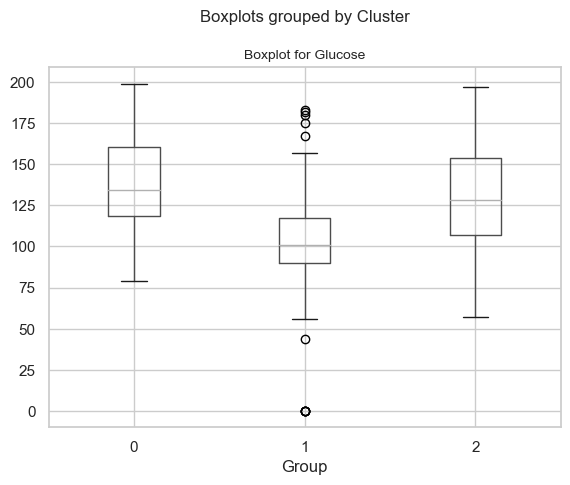

<Figure size 640x480 with 0 Axes>

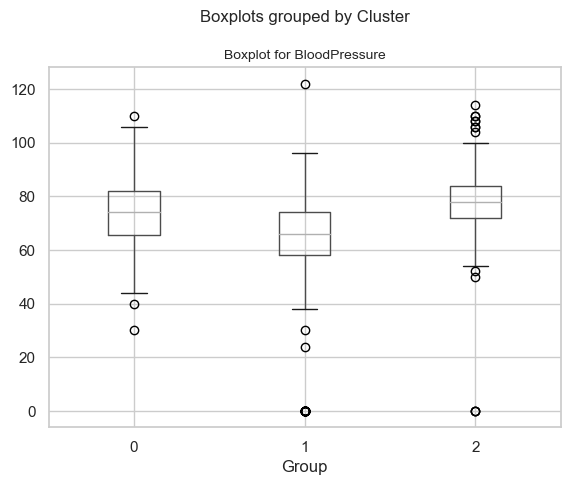

<Figure size 640x480 with 0 Axes>

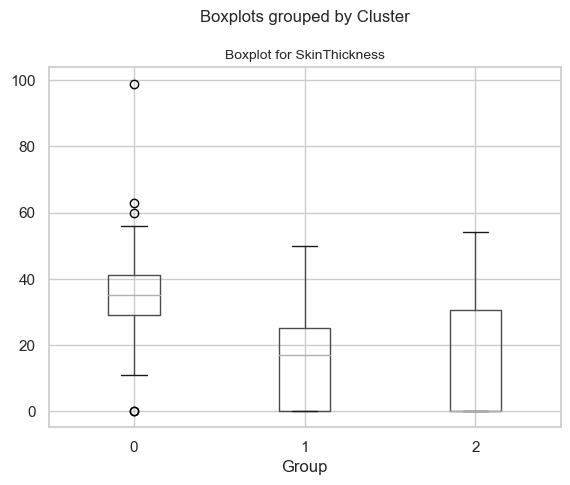

<Figure size 640x480 with 0 Axes>

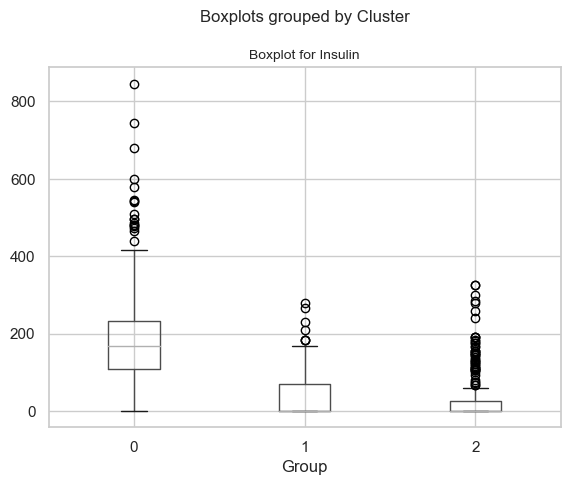

<Figure size 640x480 with 0 Axes>

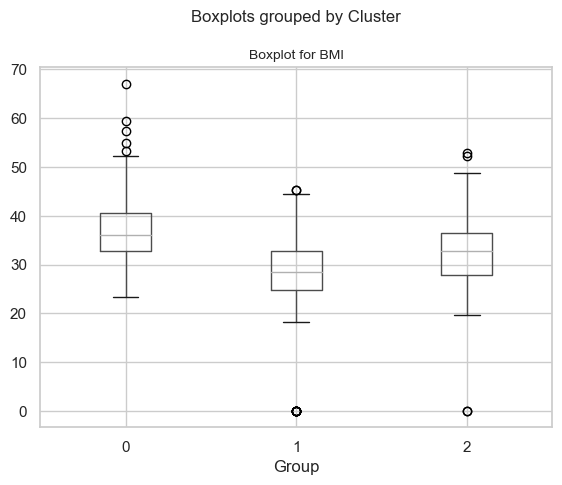

<Figure size 640x480 with 0 Axes>

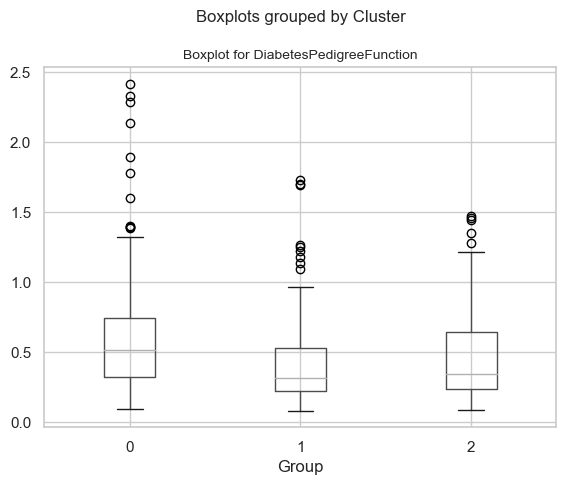

<Figure size 640x480 with 0 Axes>

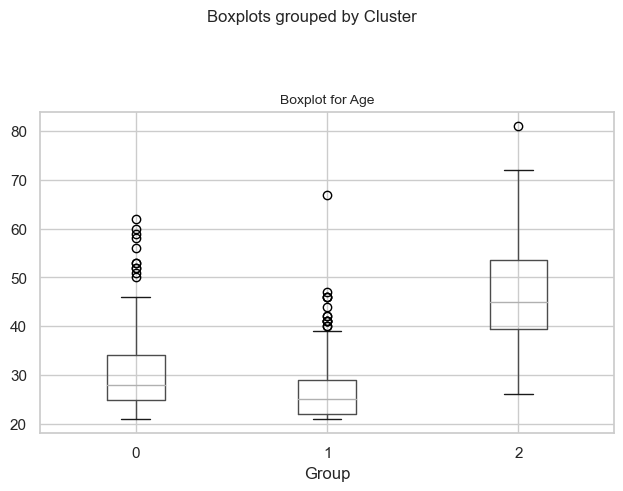

In [155]:
plt.figure(figsize=(30, 10))

# Plot box plots for each feature grouped by the cluster numbers
for col in df_unsupervised.drop('Group', axis=1).columns:
    plt.figure()
    df_unsupervised.boxplot(by='Group', column=col)
    plt.title(f'Boxplot for {col}', fontsize=10)
    plt.suptitle('Boxplots grouped by Cluster', y=1.02, fontsize=12)  # Position the subtitle appropriately

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Set tight layout with more room for titles
plt.show()

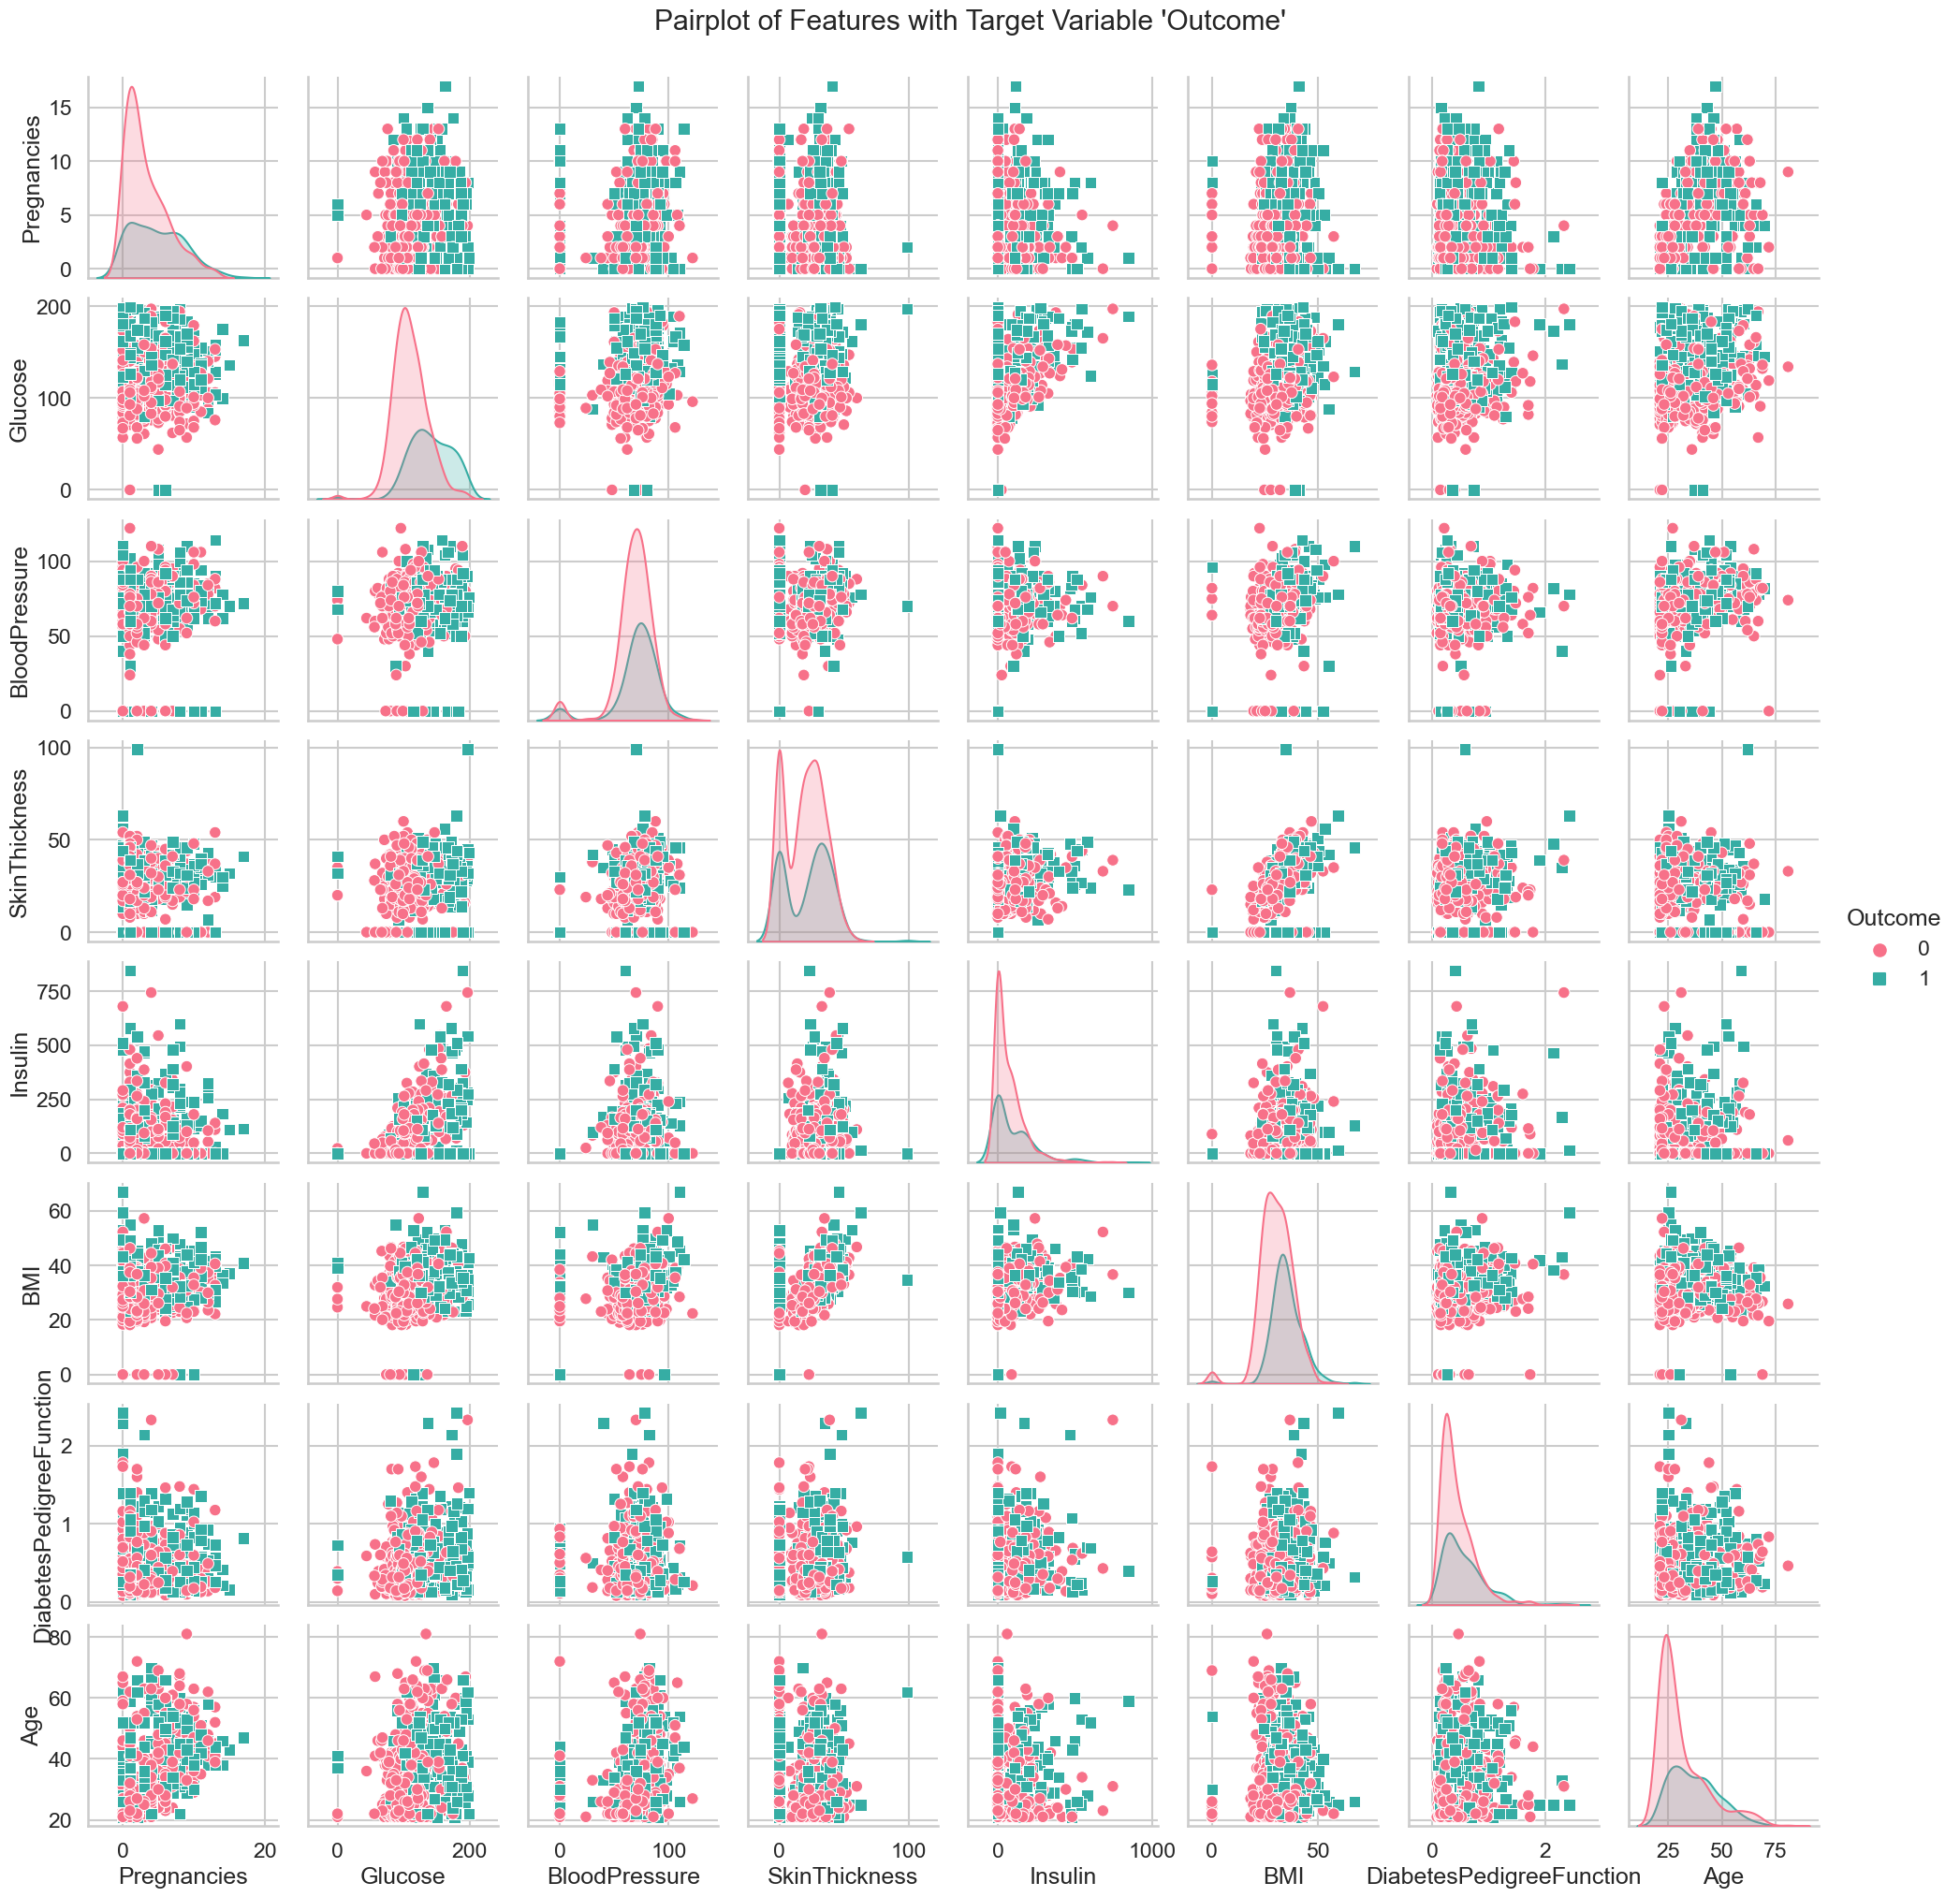

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette for better visualization
custom_palette = sns.color_palette("husl", 2)

# Set style and context for better aesthetics
sns.set(style="whitegrid")
sns.set_context("talk")

# Plotting a pairplot for all features against the target variable 'Outcome'
g = sns.pairplot(df, hue='Outcome', palette=custom_palette, markers=["o", "s"])
g.fig.suptitle("Pairplot of Features with Target Variable 'Outcome'", y=1.02)
plt.show()


It seems like that there is no significant linear relationship or structure between the variables. If the variables appear as clouds or do not show any clear patterns or correlations, it may indeed suggest that performing Principal Component Analysis (PCA) might not be beneficial in this case.

PCA is typically used in scenarios where there is some underlying structure or relationships between the variables that can be captured by reducing the dimensionality of the data. However, if the variables are independent or do not exhibit clear patterns that PCA can capture, it may not be useful in this context.


2) Data Preprocessing

2.1) Missing Observation Analysis
We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:

In [199]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [200]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [236]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
NewBMI_Obesity 1            0
NewBMI_Obesity 2            0
NewBMI_Obesity 3            0
NewBMI_Overweight           0
NewBMI_Underweight          0
NewInsulinScore_Normal      0
NewGlucose_Low              0
NewGlucose_Normal           0
NewGlucose_Overweight       0
dtype: int64

In [202]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting 
import missingno as msno
msno.bar(df);

ModuleNotFoundError: No module named 'missingno'

In [203]:
# The missing values will be filled with the median values of each variable.
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [204]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [205]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [206]:
# Missing values were filled.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

2.2) Outlier Observation Analysis

In [207]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


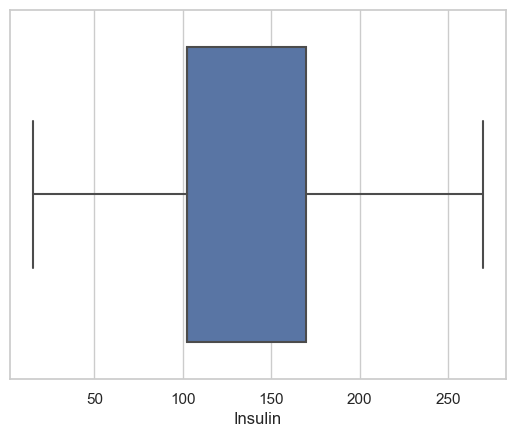

In [235]:
# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

In [209]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

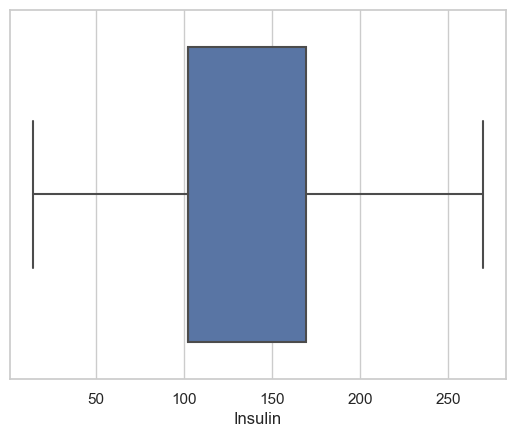

In [210]:
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

2.3) Local Outlier Factor (LOF)

In [211]:
# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [212]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

Label 1: This indicates that the data point is considered an inlier or a normal data point. Most of the data points in are assigned this label.
    
    
Label -1: This label is assigned to data points that are identified as outliers by the LOF algorithm. These data points have significantly different local densities compared to their neighbors, suggesting that they are abnormal or anomalous compared to the rest of the dataset.

In [213]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-1.740031580305444

In [214]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [215]:
# The size of the data set was examined.
df.shape

(760, 9)

3) Feature Engineering

In [216]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [217]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [218]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [219]:
# The operation performed was added to the dataframe.
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [220]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [221]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,High
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,High
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,High


4) One Hot Encoding

In [222]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [223]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,True,False,False,False,False,False,False,False,False
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,False,False,True,False,True,False,True,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,False,False,False,False,False,False,False,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,False,False,True,False,True,False,True,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False


In [224]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight']]

In [225]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,True,False,False,False,False,False,False,False,False
1,False,False,False,True,False,True,False,True,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,True,False,True,False
4,False,False,True,False,False,False,False,False,False


In [226]:
y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight'], axis = 1)
cols = X.columns
index = X.index

In [227]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


Scaling the Data

In [228]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler transformer and fit it to the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the transformed array back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=cols, index=index)

In [229]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [230]:
X = pd.concat([X,categorical_df], axis = 1)

In [231]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,True,False,False,False,False,False,False,False,False
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,False,False,False,True,False,True,False,True,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,False,False,False,False,False,False,False,False,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,False,False,False,True,False,True,False,True,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,False,False,True,False,False,False,False,False,False


In [232]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [242]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('DTC', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

LR: 0.838158 (0.039932)
DTC: 0.846053 (0.029451)
RF: 0.890789 (0.022057)
XGB: 0.890789 (0.019561)


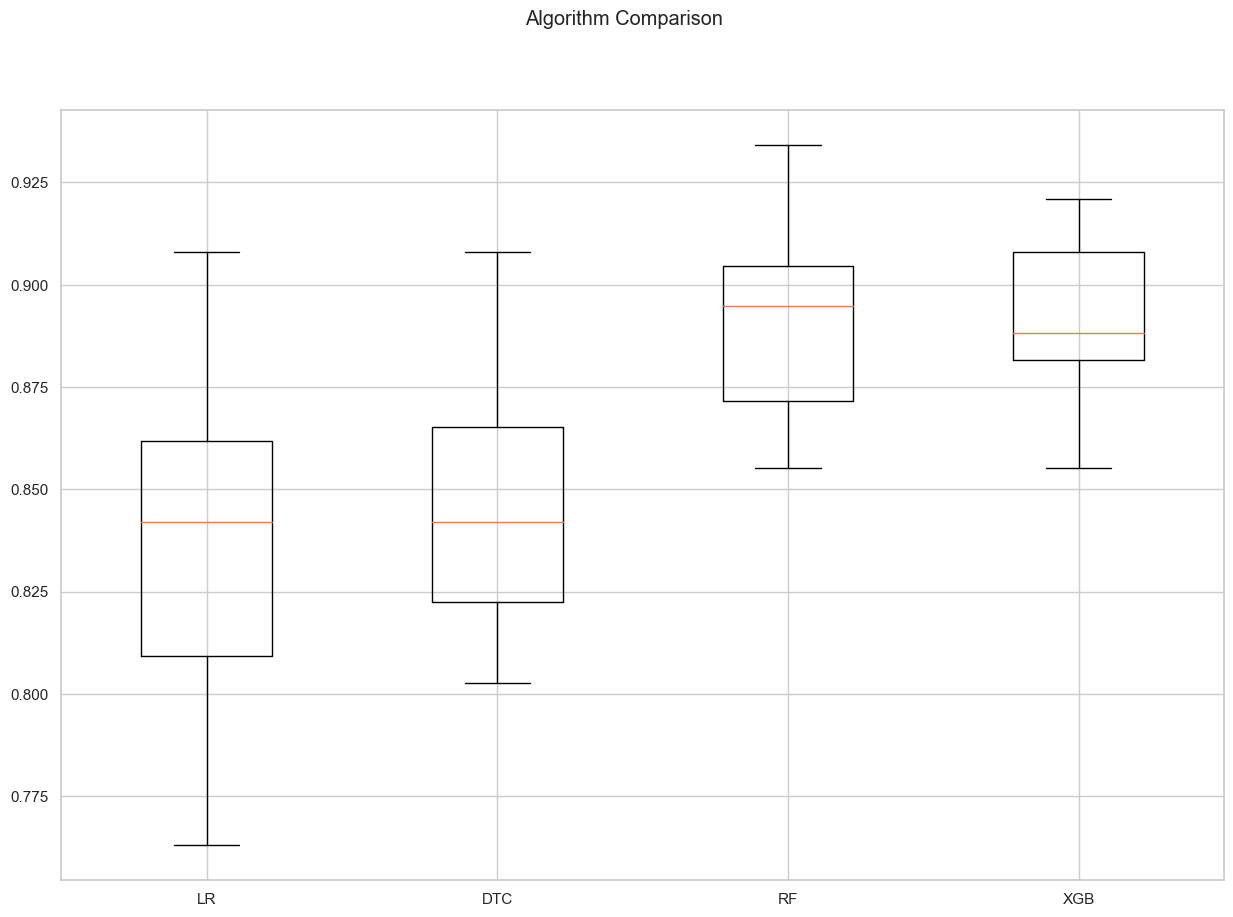

In [244]:
for name, model in models:
    
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


6) Model Tuning¶

1) Random Forests Tuning

In [245]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [246]:
rf_model = RandomForestClassifier(random_state = 12345)

In [247]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [248]:
gs_cv.best_params_

{'max_depth': 8,
 'max_features': 7,
 'min_samples_split': 5,
 'n_estimators': 500}

1.1) Final Model Installation

In [249]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [250]:
rf_tuned = rf_tuned.fit(X,y)

In [251]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.8960526315789474

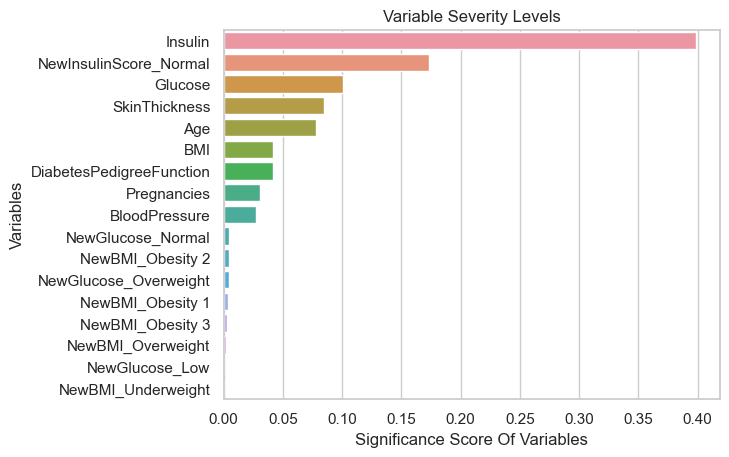

In [252]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

3) XGBoost Tuning

In [253]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [254]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [255]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [256]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 1.0}

In [257]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 1.0}

Final Model Installation

In [258]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [259]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

0.9

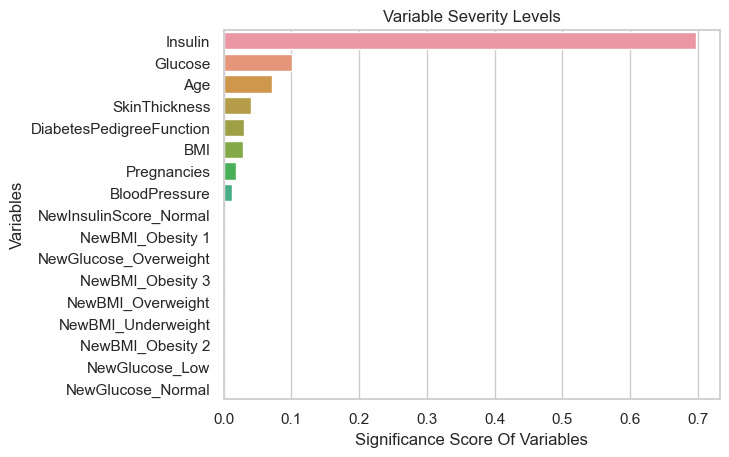

In [260]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

Comparison of Final Models

In [261]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))

# evaluate each model in turn
results = []
names = []

RF: 0.896053 (0.031386)
XGB: 0.900000 (0.028947)


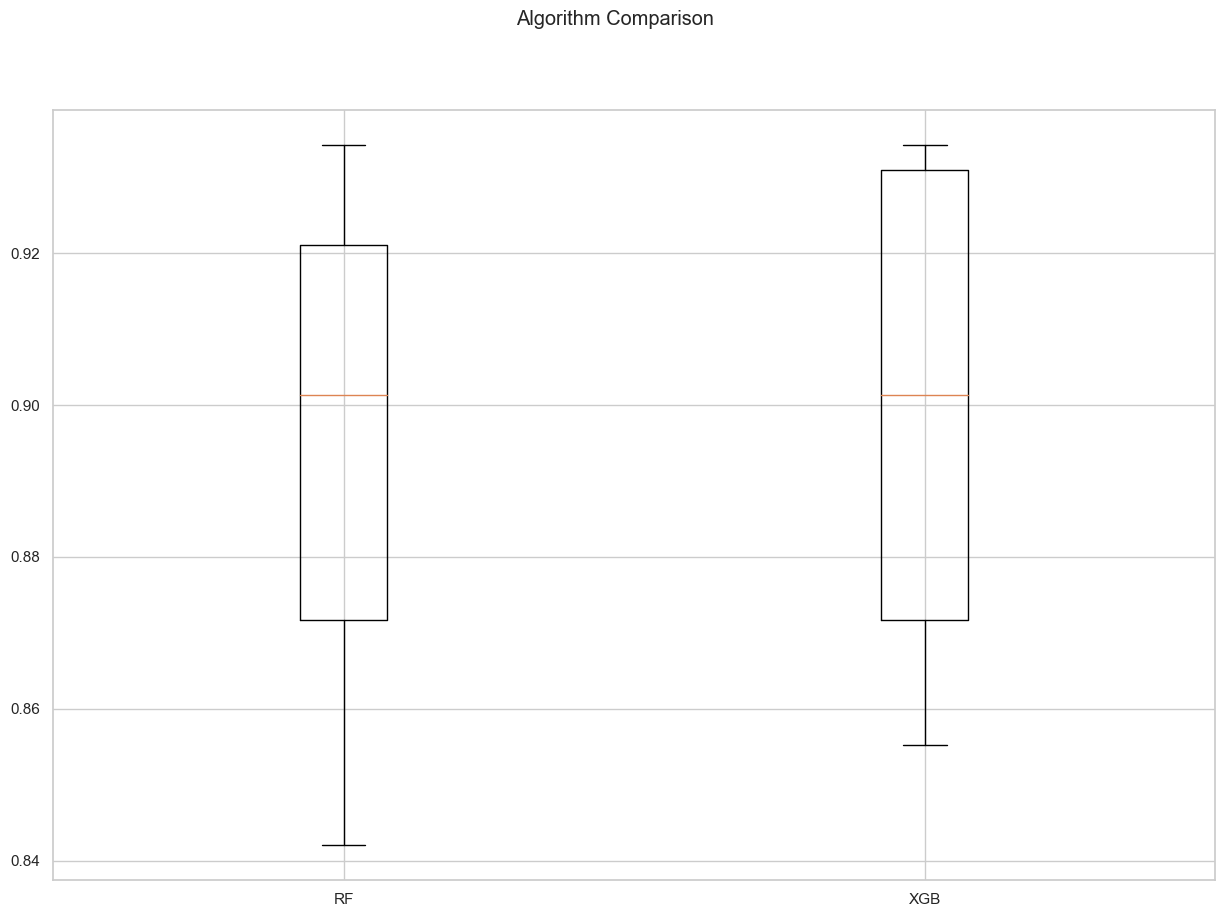

In [263]:
for name, model in models:
    
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

8) Reporting¶
The aim of this study was to create classification models for the diabetes data set and to predict whether a person is sick by establishing models and to obtain maximum validation scores in the established models. The work done is as follows:

1) Diabetes Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values. Primarily these 0 values were replaced with NaN values. Descriptive statistics of the data set were examined.

3) Data Preprocessing section; df for: The NaN values missing observations were filled with the median values of whether each variable was sick or not. The outliers were determined by LOF and dropped. The X variables were standardized with the rubost method..

4) During Model Building; Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM like using machine learning models Cross Validation Score were calculated. Later Random Forests, XGBoost, LightGBM hyperparameter optimizations optimized to increase Cross Validation value.

5) Result; The model created as a result of XGBoost hyperparameter optimization became the model with the lowest Cross Validation Score value. (0.90)